## ASEN6008 HW5

# Imports

In [1]:
import IMD
import numpy as np
from Astro_Constants import MU_EARTH_KM
import matplotlib.pyplot as plt

# 1

d:\Documents\IMD.py:423: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(T_hat.transpose(),B))


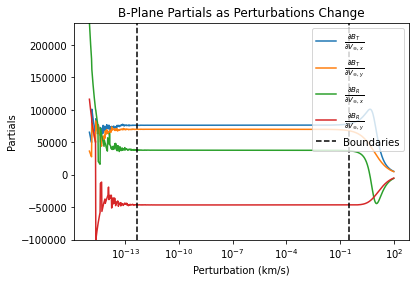

In [2]:
#givens
r_vec = np.vstack((546507.344255845, -527978.380486028, 531109.066836708)) #km
v_vec = np.vstack((-4.922058268733, 5.36316523097915, -5.22166308425181)) #km/s

#Method 2 B-Plane Targeting
Bt_nom, Br_nom, *_ = IMD.Bplane2(r_vec,v_vec,mu=MU_EARTH_KM)

# get the new parameters based on the perturbations
dvs = np.logspace(-15, 2, int(1e3))
Btpxs = []
Brpxs = []
Btpys = []
Brpys = []
for dv in dvs:
    Vpx = v_vec + np.vstack((dv,0,0))
    Vpy = v_vec + np.vstack((0,dv,0))
    Btpx,Brpx,*_ = IMD.Bplane2(r_vec,Vpx,mu=MU_EARTH_KM)
    Btpy,Brpy,*_ = IMD.Bplane2(r_vec,Vpy,mu=MU_EARTH_KM)
    Btpxs.append(Btpx)
    Brpxs.append(Brpx)
    Btpys.append(Btpy)
    Brpys.append(Brpy)

#get the B-Plane partials
dBtdVx = [(a-Bt_nom)/c for a,c in zip(Btpxs,dvs)]
dBtdVy = [(a-Bt_nom)/c for a,c in zip(Btpys,dvs)]
dBrdVx = [(a-Br_nom)/c for a,c in zip(Brpxs,dvs)]
dBrdVy = [(a-Br_nom)/c for a,c in zip(Brpys,dvs)]

#plot
plt.figure()
plt.semilogx(dvs,dBtdVx, label=r'$\frac{\partial B_T}{\partial V_{\infty,x}}$')
plt.semilogx(dvs,dBtdVy, label=r'$\frac{\partial B_T}{\partial V_{\infty,y}}$')
plt.semilogx(dvs,dBrdVx, label=r'$\frac{\partial B_R}{\partial V_{\infty,x}}$')
plt.semilogx(dvs,dBrdVy, label=r'$\frac{\partial B_R}{\partial V_{\infty,y}}$')
plt.xlabel('Perturbation (km/s)')
plt.ylabel('Partials')
plt.title('B-Plane Partials as Perturbations Change')
plt.grid
plt.ylim([min([min(dBtdVx),min(dBtdVy),min(dBrdVx),min(dBrdVy)]),max([max(dBtdVx),max(dBtdVy),max(dBrdVx),max(dBrdVy)])])
#add lines for the bounds
min_dv = 4.5e-13
max_dv = 0.3
plt.semilogx([min_dv,min_dv],[min([min(dBtdVx),min(dBtdVy),min(dBrdVx),min(dBrdVy)]),max([max(dBtdVx),max(dBtdVy),max(dBrdVx),max(dBrdVy)])], color='k', linestyle='--', label='Boundaries')
plt.semilogx([max_dv,max_dv],[min([min(dBtdVx),min(dBtdVy),min(dBrdVx),min(dBrdVy)]),max([max(dBtdVx),max(dBtdVy),max(dBrdVx),max(dBrdVy)])], color='k', linestyle='--')
plt.legend()

# 2

In [3]:
#desired b-plane
Btd = 13135.7982982557
Brd = 5022.26511510685

#acceptable range
dv_mask = np.array([dv>min_dv and dv<max_dv for dv in dvs], dtype=bool)
new_dvs = dvs[dv_mask]
pert = 1e-10

#keep calculating until within the tolerance
correction, new_v_vec = IMD.Bplane_Correction(r_vec=r_vec, v_vec=v_vec, mu=MU_EARTH_KM, Bt_desired=Btd, Br_desired=Brd, pert=pert)


#final outputs
print(f'Corrected Velocity: {new_v_vec} km/s\n')
print(f'Difference: {correction} km/s\n')


Corrected Velocity: [[-5.2204508 ]
 [ 5.2218707 ]
 [-5.22166308]] km/s

Difference: [[-0.29839253]
 [-0.14129453]
 [ 0.        ]] km/s



d:\Documents\IMD.py:423: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(T_hat.transpose(),B))
